In [2]:
#import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# loading files for analysis

IL_19 = pd.read_csv('NP.SPgiving.2019.csv')
IL_18 = pd.read_csv('NP.SPgiving.2018.csv')
IL_17 = pd.read_csv('NP.SPgiving.2017.csv')
IL_16 = pd.read_csv('NP.SPgiving.2016.csv')
IL_15 = pd.read_csv('NP.SPgiving.2015.csv')

# renaming column headers

IL_19.columns = ['ID', 'gvg_2019', 'gvg_wsc_2019', 'LinkedSC', 'SCAmt', 'LinkedName', 'LinkedAmt']
IL_18.columns = ['ID', 'gvg_2018', 'gvg_wsc_2018', 'LinkedSC', 'SCAmt', 'LinkedName', 'LinkedAmt']
IL_17.columns = ['ID', 'gvg_2017', 'gvg_wsc_2017', 'LinkedSC', 'SCAmt', 'LinkedName', 'LinkedAmt']
IL_16.columns = ['ID', 'gvg_2016', 'gvg_wsc_2016', 'LinkedSC', 'SCAmt', 'LinkedName', 'LinkedAmt']
IL_15.columns = ['ID', 'gvg_2015', 'gvg_wsc_2015', 'LinkedSC', 'SCAmt', 'LinkedName', 'LinkedAmt']

print(IL_19.head())

     ID  gvg_2019  gvg_wsc_2019  LinkedSC  SCAmt            LinkedName  \
0  1372     500.0         500.0    1000.0      0  Sheppard Family Fund   
1   786    5600.0        5600.0    5700.0      0                   NaN   
2  5129     425.0         425.0     525.0      0                   NaN   
3  6780     375.0         375.0     475.0      0      Fortnightly Club   
4  4114     250.0         250.0     350.0      0      Fortnightly Club   

   LinkedAmt  
0        500  
1        100  
2        100  
3        100  
4        100  


In [4]:
# condense dataframes to ID, name and giving columns

gvg_19_condense = IL_19[['ID', 'gvg_2019']]
gvg_18_condense = IL_18[['ID', 'gvg_2018']]
gvg_17_condense = IL_17[['ID', 'gvg_2017']]
gvg_16_condense = IL_16[['ID', 'gvg_2016']]
gvg_15_condense = IL_15[['ID', 'gvg_2015']]

In [5]:
# merge df's through inner merge

combined_gvg = gvg_19_condense.merge(gvg_18_condense).merge(gvg_17_condense).merge(gvg_16_condense).merge(gvg_15_condense)
print(combined_gvg.head())

     ID  gvg_2019  gvg_2018  gvg_2017  gvg_2016  gvg_2015
0   786    5600.0      5750    5000.0      1000      1000
1   271     175.0       175     150.0       120       100
2  3307     180.0       350     300.0       225        75
3   510    3777.7      1200    1225.0      1200       210
4  6542    1700.0      1400    1200.0      1100      1200


In [6]:
print(combined_gvg.tail())

      ID  gvg_2019  gvg_2018  gvg_2017  gvg_2016  gvg_2015
48  7010      50.0       125     125.0       145        50
49   744      25.0       100     274.0       150        30
50  2756      25.0        50     175.0       225       200
51  6611     200.0       300     500.0       570       500
52  1705    1000.0      1300     975.0       475       150


In [7]:
# merge dataframes to retain all rows through an outer merge

gvg_19_18_outer = pd.merge(gvg_19_condense, gvg_18_condense, how = 'outer').reset_index(drop = True)

gvg_19_18_outer.to_csv('SP.gvg_19_18.csv')

gvg_17_outer = pd.merge(gvg_19_18_outer, gvg_17_condense, how = 'outer').reset_index(drop = True)

gvg_16_outer = pd.merge(gvg_17_outer, gvg_16_condense, how = 'outer').reset_index(drop = True)

combined_gvg_df = pd.merge(gvg_16_outer, gvg_15_condense, how = 'outer').reset_index(drop = True)

# replace all NaN cells with 0

combined_gvg_df.fillna(0, inplace = True)

# save df to csv file

combined_gvg_df.to_csv('SP.combined_gvg.csv')

print(combined_gvg_df.tail())

# print(combined_gvg_df.info())


       ID  gvg_2019  gvg_2018  gvg_2017  gvg_2016  gvg_2015
985  6966       0.0       0.0       0.0       0.0      25.0
986  7081       0.0       0.0       0.0       0.0      25.0
987  7017       0.0       0.0       0.0       0.0      20.0
988  5452       0.0       0.0       0.0       0.0      10.0
989  3597       0.0       0.0       0.0       0.0       5.0


In [8]:
# calculate aggregate giving stats by year

total_19 = round(np.sum(combined_gvg_df['gvg_2019']), 2)

total_18 = round(np.sum(combined_gvg_df['gvg_2018']), 2)

total_17 = round(np.sum(combined_gvg_df['gvg_2017']), 2)

total_16 = round(np.sum(combined_gvg_df['gvg_2016']), 2)

total_15 = round(np.sum(combined_gvg_df['gvg_2015']), 2)

print('Total giving per calendar year')
print('2019: $' + str(total_19))
print('2018: $' + str(total_18))
print('2017: $' + str(total_17))
print('2016: $' + str(total_16))
print('2015: $' + str(total_15))

Total giving per calendar year
2019: $120553.2
2018: $114452.0
2017: $112389.41
2016: $81155.0
2015: $58953.0


In [9]:
# calculate mean values by year

nonzero_2019 = [amt for amt in combined_gvg_df['gvg_2019'] if amt > 0]
nonzero_2018 = [amt for amt in combined_gvg_df['gvg_2018'] if amt > 0]
nonzero_2017 = [amt for amt in combined_gvg_df['gvg_2017'] if amt > 0]
nonzero_2016 = [amt for amt in combined_gvg_df['gvg_2016'] if amt > 0]
nonzero_2015 = [amt for amt in combined_gvg_df['gvg_2015'] if amt > 0]

mean_2019 = round(np.mean(nonzero_2019), 2)
mean_2018 = round(np.mean(nonzero_2018), 2)
mean_2017 = round(np.mean(nonzero_2017), 2)
mean_2016 = round(np.mean(nonzero_2016), 2)
mean_2015 = round(np.mean(nonzero_2015), 2)

print('Average contributions per donor by calendar year')
print('$' +str(mean_2019))
print('$' +str(mean_2018))
print('$' +str(mean_2017))
print('$' +str(mean_2016))
print('$' +str(mean_2015))

Average contributions per donor by calendar year
$318.92
$248.27
$270.82
$296.19
$215.16


In [10]:
# calculate median values each year

median_2019 = round(np.median(nonzero_2019), 2)
median_2018 = round(np.median(nonzero_2018), 2)
median_2017 = round(np.median(nonzero_2017), 2)
median_2016 = round(np.median(nonzero_2016), 2)
median_2015 = round(np.median(nonzero_2015), 2)

print('Median contributions by calendar year')
print('$' +str(median_2019))
print('$' +str(median_2018))
print('$' +str(median_2017))
print('$' +str(median_2016))
print('$' +str(median_2015))

Median contributions by calendar year
$125.0
$100.0
$100.0
$125.0
$100.0


In [11]:
# calculate number of donors each calendar year

count_19 = np.count_nonzero(combined_gvg_df['gvg_2019'])
count_18 = np.count_nonzero(combined_gvg_df['gvg_2018'])
count_17 = np.count_nonzero(combined_gvg_df['gvg_2017'])
count_16 = np.count_nonzero(combined_gvg_df['gvg_2016'])
count_15 = np.count_nonzero(combined_gvg_df['gvg_2015'])

print('Number of donors by calendar year')
print(count_19)
print(count_18)
print(count_17)
print(count_16)
print(count_15)

Number of donors by calendar year
378
461
415
274
274


In [12]:
# include only giving $1,000+ in data

IL_td_19 = [amt for amt in nonzero_2019 if amt >= 1000]
IL_td_18 = [amt for amt in nonzero_2018 if amt >= 1000]
IL_td_17 = [amt for amt in nonzero_2017 if amt >= 1000]
IL_td_16 = [amt for amt in nonzero_2016 if amt >= 1000]
IL_td_15 = [amt for amt in nonzero_2015 if amt >= 1000]

# calculate stats on gifts $1,000+

td_total_19 = round(np.sum(IL_td_19), 2)
td_total_18 = round(np.sum(IL_td_18), 2)
td_total_17 = round(np.sum(IL_td_17), 2)
td_total_16 = round(np.sum(IL_td_16), 2)
td_total_15 = round(np.sum(IL_td_15), 2)
td_count_19 = np.count_nonzero(IL_td_19)
td_count_18 = np.count_nonzero(IL_td_18)
td_count_17 = np.count_nonzero(IL_td_17)
td_count_16 = np.count_nonzero(IL_td_16)
td_count_15 = np.count_nonzero(IL_td_15)

print(td_total_19)
print(td_count_19)
print(td_count_18)
print(td_count_17)
print(td_count_16)
print(td_count_15)


58353.2
35
33
36
30
23


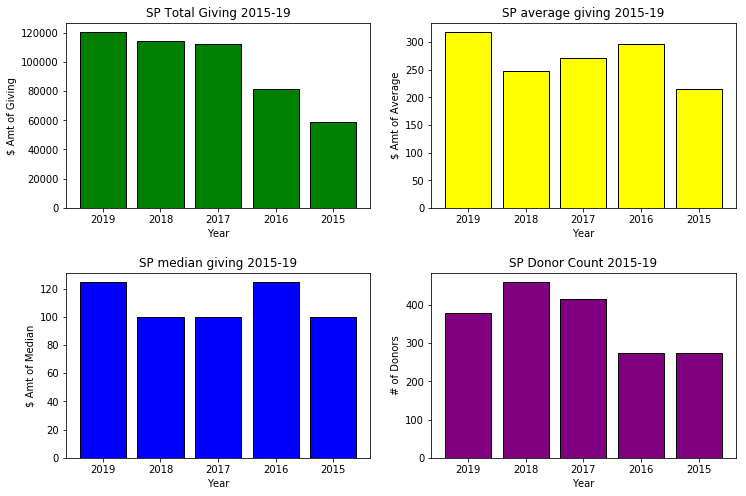

In [13]:
# plot total giving results

years = ['2019', '2018', '2017', '2016', '2015']

total_gvg = np.array([total_19, total_18, total_17, total_16, total_15])
mean_array = np.array([mean_2019, mean_2018, mean_2017, mean_2016, mean_2015])
median_array = np.array([median_2019, median_2018, median_2017, median_2016, median_2015])
count_array = np.array([count_19, count_18, count_17, count_16, count_15])

plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
plt.bar(years, total_gvg, facecolor = 'green', edgecolor = 'black' )
plt.title('SP Total Giving 2015-19')
plt.xlabel('Year')
plt.ylabel('$ Amt of Giving')

plt.subplot(2, 2, 2)
plt.bar(years, mean_array, facecolor = 'yellow', edgecolor = 'black' )
plt.title('SP average giving 2015-19')
plt.xlabel('Year')
plt.ylabel('$ Amt of Average')

plt.subplot(2, 2, 3)
plt.bar(years, median_array, facecolor = 'blue', edgecolor = 'black' )
plt.title('SP median giving 2015-19')
plt.xlabel('Year')
plt.ylabel('$ Amt of Median')

plt.subplot(2, 2, 4)
plt.bar(years, count_array, facecolor = 'purple', edgecolor = 'black' )
plt.title('SP Donor Count 2015-19')
plt.xlabel('Year')
plt.ylabel('# of Donors')

plt.subplots_adjust(hspace = 0.35)
plt.savefig('SP.giving_plots.png')
plt.show()

In [14]:
print(total_gvg)
print(mean_array)
print(median_array)
print(count_array)

[120553.2  114452.   112389.41  81155.    58953.  ]
[318.92 248.27 270.82 296.19 215.16]
[125. 100. 100. 125. 100.]
[378 461 415 274 274]
